 Job Postings Tracker
 ===
 The Harbor market gets worse than ever since the late 2022.
 
 
 Reference
 ---
 1. [Jobs Postings Index](https://www.hiringlab.org/2022/12/15/introducing-the-indeed-job-postings-index/?ref=blog.pragmaticengineer.com)
 2. [Jobs Postings Tracker Hithub Data](https://github.com/hiring-lab/job_postings_tracker?isid=hiringlab_us&ikw=hiringlab_us_2022%2F12%2F15%2Fintroducing-the-indeed-job-postings-index%2F_textlink_https%3A%2F%2Fgithub.com%2Fhiring-lab%2Fjob_postings_tracker)

In [9]:
# description
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import pandas as pd

%matplotlib inline

1. Use ChatGPT load data form th github, and convert date to datetime
   "https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/US/aggregate_job_postings_US.csv"


In [2]:
# load data form th github
# convert date to datetime

US="https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/US/aggregate_job_postings_US.csv"

df = pd.read_csv(US)


In [3]:
df.head(2)

,date,jobcountry,indeed_job_postings_index_SA,indeed_job_postings_index_NSA,variable
0,2020-02-01,US,100.00,100.00,total postings
1,2020-02-02,US,99.98,100.06,total postings


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           2282 non-null   object 
 1   jobcountry                     2282 non-null   object 
 2   indeed_job_postings_index_SA   2282 non-null   float64
 3   indeed_job_postings_index_NSA  2282 non-null   float64
 4   variable                       2282 non-null   object 
dtypes: float64(2), object(3)
memory usage: 89.3+ KB


Observations
---
1. There are totally 2282 (greater that 365x4).
2. 'date' is in Timestamp format, but not standard valid for pandas.
3. indeed_job_postings_(\*) is calulated with compared to the first date's record and valued without percentage, (i.e. 100 at 2020-03-02, and so on). 

<AxesSubplot:xlabel='date', ylabel='indeed_job_postings_index_SA'>

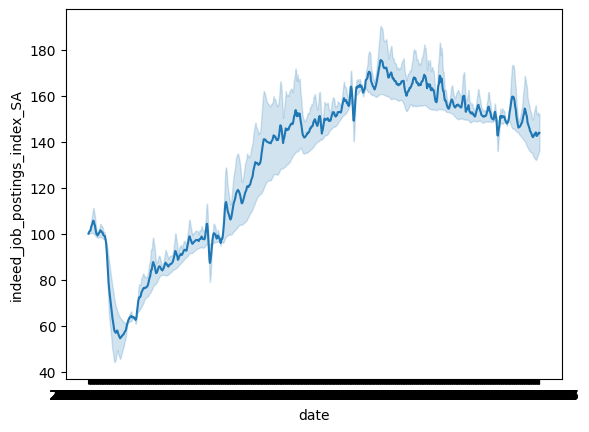

In [4]:
# Plot indeed_job_postings_index over time using seaborn,
sns.lineplot(data=df, x='date', y='indeed_job_postings_index_SA')

To remove the mess in X-axis, 1). reduce the number of X-ticks, displaying in periodic, 2). rotate the date in X-ticks, 3). Zoom in the picture.

In [5]:
# convert format to valid pandas datetime format
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           2282 non-null   datetime64[ns]
 1   jobcountry                     2282 non-null   object        
 2   indeed_job_postings_index_SA   2282 non-null   float64       
 3   indeed_job_postings_index_NSA  2282 non-null   float64       
 4   variable                       2282 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 89.3+ KB


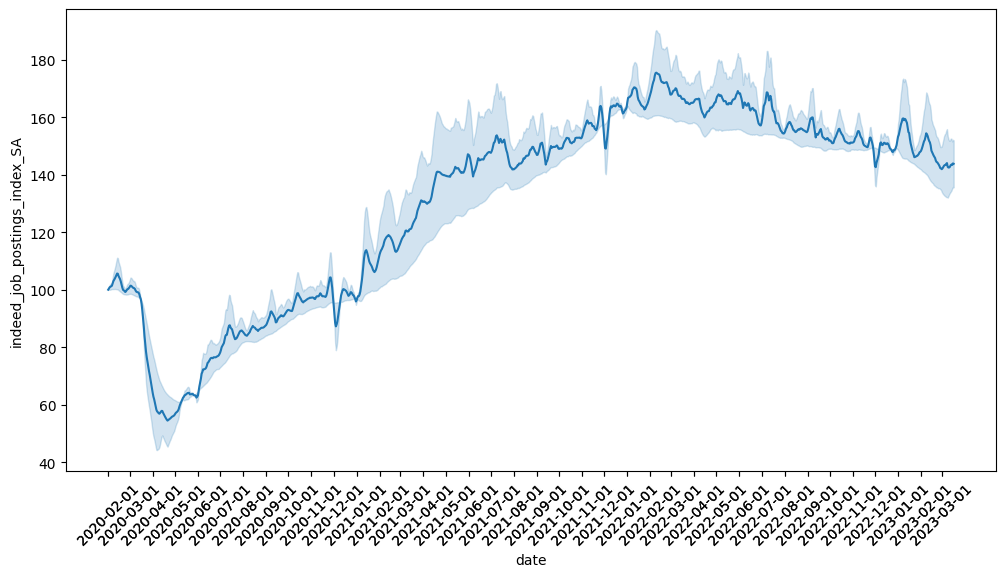

In [12]:
plt.figure(figsize=[12,6])
ax = sns.lineplot(data=df, x='date', y='indeed_job_postings_index_SA')

# Set xticks only for the first date in each display
xticks = df['date'][df['date'].dt.is_month_start].tolist()
ax.set_xticks(xticks)
ax.tick_params(axis='x', rotation=45)

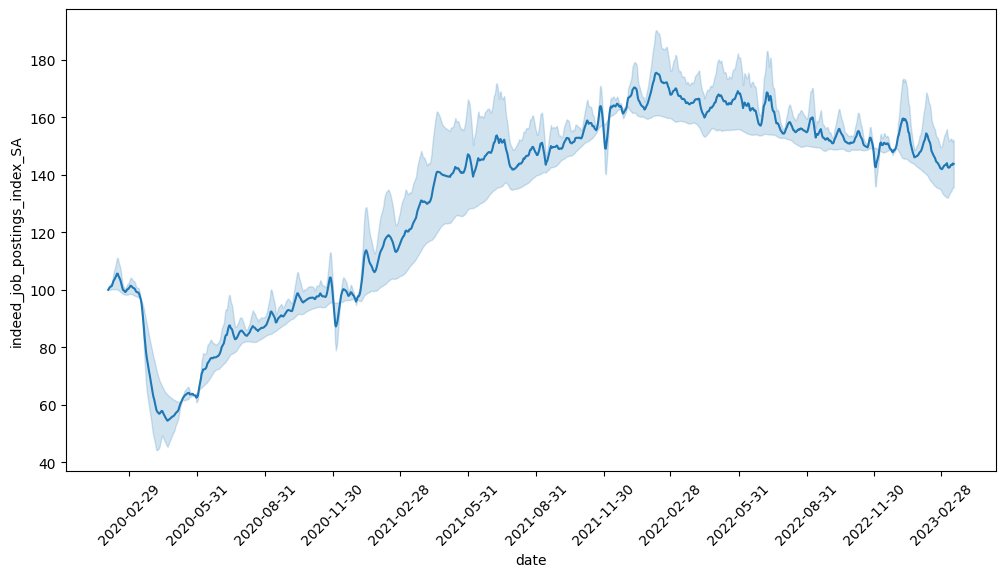

In [13]:
# display xticks every three months starting from 2020-02-01
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='date', y='indeed_job_postings_index_SA')

start_date = pd.to_datetime('2020-02-01')
xticks = pd.date_range(start=start_date, end=df['date'].max(), freq='3M')
ax.set_xticks(xticks)
ax.tick_params(axis='x', rotation=45)

Try to duplicate above by "plotly"

In [ ]:
# Use plotly as visualization backend



# Create a Plotly figure with a line plot of indeed_job_postings_index over time
fig = go.Figure(data=go.Scatter(x=df['date'], y=df['indeed_job_postings_index_SA'], mode='lines'))

# Set xticks every three months starting from 2020-02-01
start_date = pd.to_datetime('2020-02-01')
xticks = pd.date_range(start=start_date, end=df['date'].max(), freq='3M').tolist()

# Update x-axis layout with xticks and rotation
fig.update_layout(xaxis=dict(tickmode='array', tickvals=xticks, tickangle=45))

# Show the plot
fig.show()


What happens? It looks a little messy!

In [19]:
df.nunique()

date                             1141
jobcountry                          1
indeed_job_postings_index_SA     1965
indeed_job_postings_index_NSA    2007
variable                            2
dtype: int64

In [26]:
# number of unique values in each column

df.nunique()

date                             1141
jobcountry                          1
indeed_job_postings_index_SA     1965
indeed_job_postings_index_NSA    2007
variable                            2
dtype: int64

In [27]:
df['variable'].unique()

array(['total postings', 'new postings'], dtype=object)

These solve the problem. Size of Dataframe is double of size of `date` since there are two kinds of data put together.
`'total postings', 'new postings'` (from information of `variable`.

In [6]:
df_US=df[df['variable']==(df['variable'].unique())[1]]

In [10]:
def vis_plotly(df,col='indeed_job_postings_index_SA'):
    fig = go.Figure(data=go.Scatter(x=df['date'], y=df[col], mode='lines'))
    start_date = pd.to_datetime('2020-02-01')
    xticks = pd.date_range(start=start_date, end=df['date'].max(), freq='3M').tolist()
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=xticks, tickangle=45))
    fig.show()
    return fig

In [ ]:
vis_plotly(df_US)

We sucessifully duplicate the picture in  ref 1. [Jobs Postings Index](https://www.hiringlab.org/2022/12/15/introducing-the-indeed-job-postings-index/?ref=blog.pragmaticengineer.com)!

In [12]:
countries=['AU','CA','DE','FR','GB','IE','JP']

C=["https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/{0}/aggregate_job_postings_{0}.csv".format(country,country) for country in countries]


In [13]:
dfs=[pd.read_csv(c) for c in C]

In [14]:
for df_ in dfs:
    df_['date'] = pd.to_datetime(df_['date'])
    #df_=df_[df_['variable']==(df_['variable'].unique())[1]]

In [15]:
df_world=pd.DataFrame()
df_world['date']=dfs[0]['date']
df_world['variable']=dfs[0]['variable']
for i in range(len(countries)):
    df_world[countries[i]]=dfs[i]['indeed_job_postings_index_SA']
df_world=df_world[df_world['variable']==(df_world['variable'].unique())[1]]    

In [16]:
df_world[countries]

,AU,CA,DE,FR,GB,IE,JP
1141,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1142,97.80,100.17,100.92,100.02,100.24,100.21,100.43
1143,97.92,100.37,101.70,100.11,100.43,100.39,102.56
1144,98.95,100.58,100.93,99.03,100.02,100.02,101.64
1145,99.14,100.88,101.74,98.75,99.91,100.28,101.54
...,...,...,...,...,...,...,...
2277,193.86,134.50,185.04,162.67,129.79,174.92,152.29
2278,193.36,135.73,181.13,162.51,129.77,175.48,155.99
2279,193.88,137.09,179.12,162.97,129.84,175.12,160.02
2280,194.20,138.42,177.26,163.30,129.85,175.19,165.81


In [17]:
import plotly.express as px

fig = px.scatter(df_world, x='date', y=countries)
fig.update_traces(
    mode='lines',
    line=dict(width=2),
    showlegend=True
)

# change hover defaulted
fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

# change the X-Y labels
fig.update_layout(template='simple_white',
    yaxis_title='Rate (100)%',
    xaxis_title="Date (yyyy-mm-dd)",
    legend_title="Countries",              
    title={
        'text': "Job Postings Tracker",
        'y':0.9,
        'x':0.5,        
        'xanchor': 'center',
        'yanchor': 'top'},            
    hovermode="x"
)

fig.show()

In [87]:
!pip install bokeh

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 15.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 47.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapidox 5.90.0 requires doxypypy, which is not installed.
kapidox 5.90.0 requires doxyqml, which is not installed.


In [30]:
import bokeh
from bokeh.io import output_file, show, output_notebook
from bokeh.models import DatetimeTickFormatter, DatetimeTicker,Scatter
from bokeh.plotting import figure

In [31]:
# display directly on Jupyter 
output_notebook()

Loading BokehJS ...

In [33]:

# Create a Bokeh figure with a line plot of indeed_job_postings_index over time
fig = figure(title="Indeed Job Postings", x_axis_label="Date", y_axis_label="Index")
fig.line(df_world['date'], df_world['FR'], line_width=2)

# Show the plot
#output_file("job_postings.html")
show(fig)


kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found
[20206:20232:0327/104018.929468:ERROR:object_proxy.cc(623)] Failed to call method: org.freedesktop.DBus.StartServiceByName: object_path= /org/freedesktop/DBus: org.freedesktop.DBus.Error.Spawn.ChildExited: Process org.freedesktop.portal.Desktop exited with status 127
[20206:20206:0327/104019.013075:ERROR:object_proxy.cc(623)] Failed to call method: org.kde.KWallet.isEnabled: object_path= /modules/kwalletd5: org.freedesktop.DBus.Error.NoReply: Message recipient disconnected from message bus without replying
[20206:20206:0327/104019.013160:ERROR:kwallet_dbus.cc(100)] Error contacting kwalletd5 (isEnabled)
[20206:20206:0327/104019.015382:ERROR:object_proxy.cc(623)] Failed to call method: org.kde.KLauncher.start_service_by_desktop_name: object_path= /KLauncher: org.freedesktop.DBus.Error.ServiceUnknown: The name org.kde.klauncher was not provided by any .service files
[20206:20206:0327/104019.015432:ERROR:k

Opening in existing browser session.


In [35]:



# Create a Bokeh figure with a line plot of indeed_job_postings_index over time
fig = figure(title="Indeed Job Postings", x_axis_label="Date", y_axis_label="Index")
fig.line(df_world['date'], df_world['JP'], line_width=2)
fig.line(df_world['date'], df_world['FR'], line_width=2,color='red')


# Update x-axis formatter with xticks and rotation
fig.xaxis.formatter = DatetimeTickFormatter(months='%Y-%m', days='%d', hours='%H:%M')

# Show the plot
#output_file("job_postings.html")
show(fig);


kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found
[20437:20462:0327/104135.310378:ERROR:object_proxy.cc(623)] Failed to call method: org.freedesktop.DBus.StartServiceByName: object_path= /org/freedesktop/DBus: org.freedesktop.DBus.Error.Spawn.ChildExited: Process org.freedesktop.portal.Desktop exited with status 127
[20437:20437:0327/104135.412774:ERROR:object_proxy.cc(623)] Failed to call method: org.kde.KWallet.isEnabled: object_path= /modules/kwalletd5: org.freedesktop.DBus.Error.NoReply: Message recipient disconnected from message bus without replying
[20437:20437:0327/104135.412809:ERROR:kwallet_dbus.cc(100)] Error contacting kwalletd5 (isEnabled)
[20437:20437:0327/104135.413774:ERROR:object_proxy.cc(623)] Failed to call method: org.kde.KLauncher.start_service_by_desktop_name: object_path= /KLauncher: org.freedesktop.DBus.Error.ServiceUnknown: The name org.kde.klauncher was not provided by any .service files
[20437:20437:0327/104135.413795:ERROR:k

Opening in existing browser session.
